In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Getting the dataset
INCOME_CA_LABELS_PATH = os.path.join("datasets", "california", "alt_acsincome_ca_labels_85.csv")
INCOME_CA_FEATURES_PATH = os.path.join("datasets", "california", "alt_acsincome_ca_features_85(1).csv")

# Load the dataset as Pandas dataframe
def load_income_data_ca(dataPath):
    return pd.read_csv(dataPath)

# Store the labels in different variables
income_ca_labels = load_income_data_ca(INCOME_CA_LABELS_PATH)
income_ca_features = load_income_data_ca(INCOME_CA_FEATURES_PATH)

# PART 1: Compréhension du jeu de données

        PINCP
0        True
1        True
2       False
3        True
4       False
...       ...
166310  False
166311   True
166312   True
166313   True
166314  False

[166315 rows x 1 columns]
        AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P
0       41.0  4.0  24.0  1.0  2555.0    6.0   1.0  60.0  2.0    1.0
1       77.0  7.0  22.0  1.0  4920.0   39.0   0.0  35.0  1.0    1.0
2       38.0  1.0  18.0  1.0   440.0    6.0   1.0  50.0  1.0    1.0
3       30.0  1.0  22.0  5.0  1555.0    6.0   2.0  80.0  1.0    6.0
4       36.0  1.0  16.0  1.0  4030.0  314.0   1.0  70.0  2.0    1.0
...      ...  ...   ...  ...     ...    ...   ...   ...  ...    ...
166310  25.0  1.0  20.0  1.0  4720.0    6.0   7.0   8.0  2.0    1.0
166311  34.0  1.0  22.0  1.0   110.0  210.0   0.0  40.0  1.0    6.0
166312  54.0  3.0  18.0  1.0  7700.0    6.0   1.0  50.0  1.0    1.0
166313  39.0  1.0  16.0  5.0  9130.0    6.0   0.0  50.0  1.0    1.0
166314  32.0  1.0   9.0  5.0  4020.0  303.0   0.0  40.0  

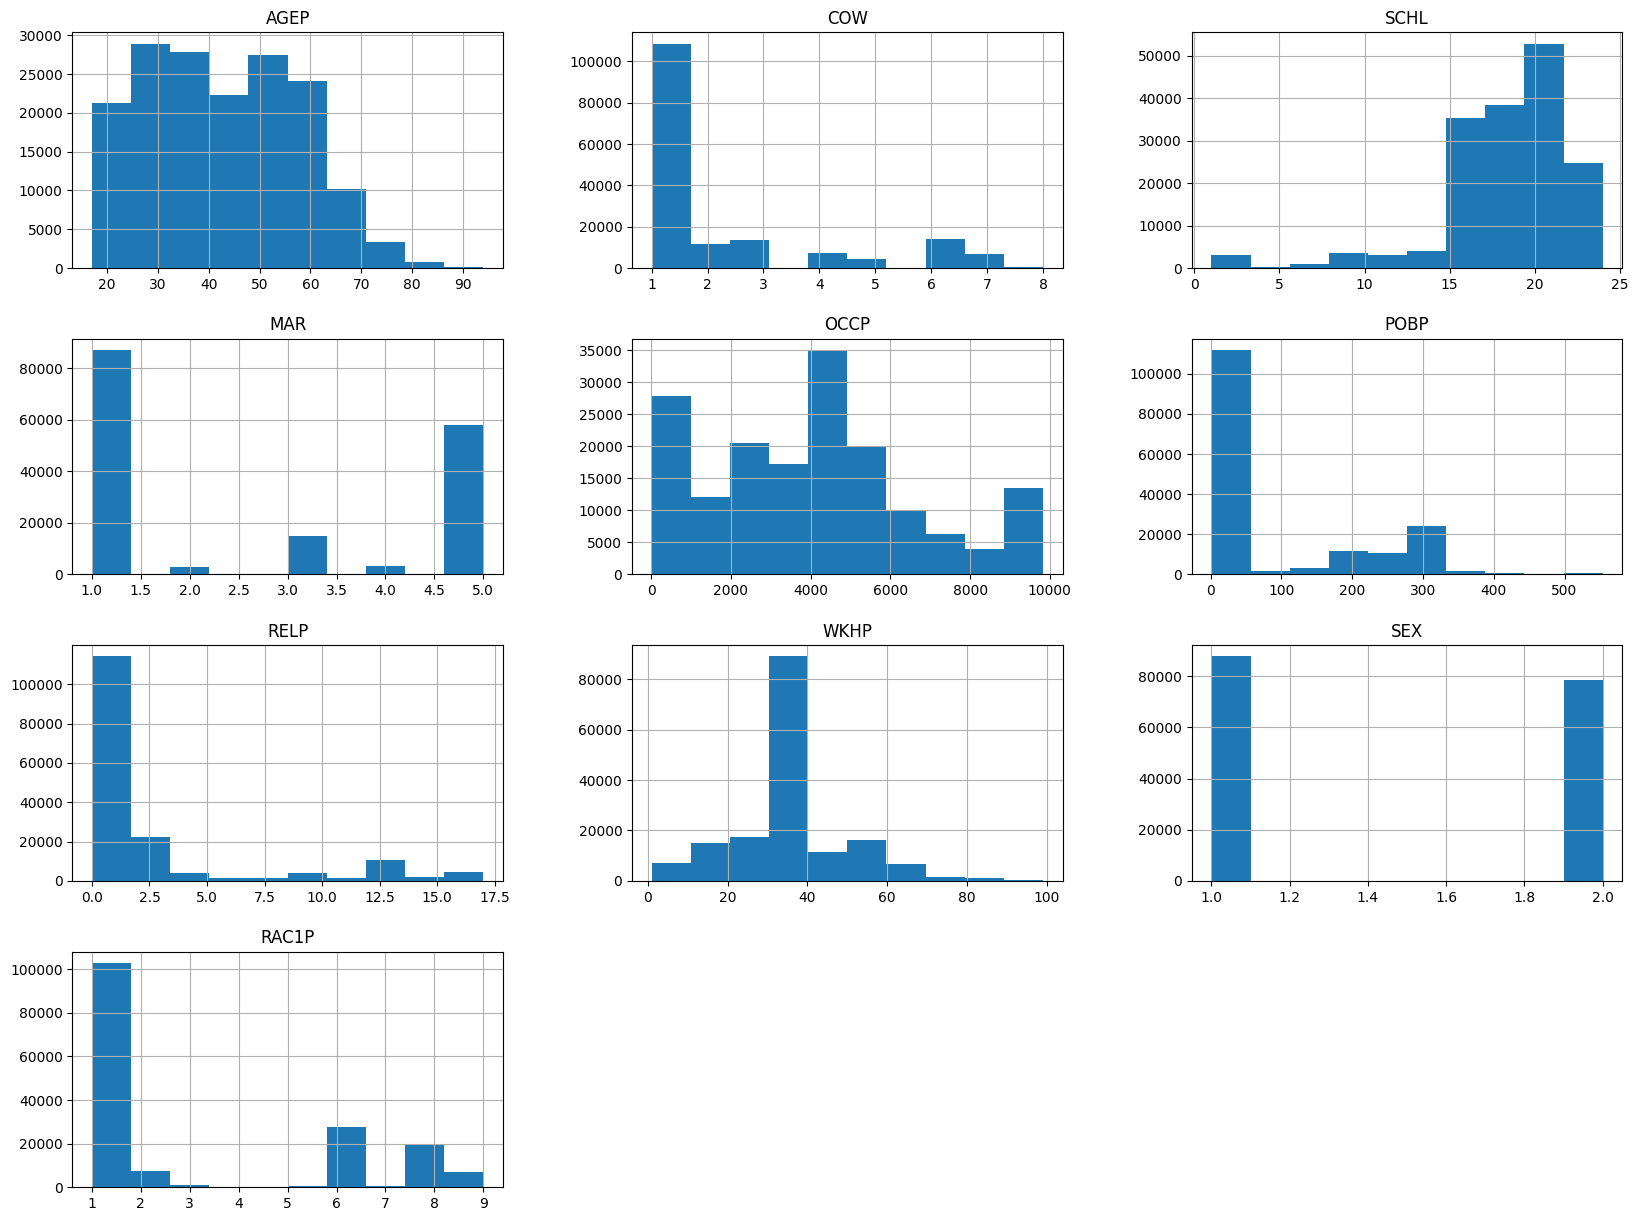

In [2]:
# Analysis of the distribution of feature values
print(income_ca_labels)
print(income_ca_features)

income_ca_features.info()
income_ca_features.hist(figsize=(20,15))
plt.show()

In [3]:
# Import the sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split the dataset into 80 train/20 test subsets, and randomize the order using the sklearn splitting function 
feature_train_set, feature_test_set, labels_train_set, labels_test_set = train_test_split(income_ca_features, income_ca_labels, test_size=0.2, random_state=0)

In [4]:
# Importing StandardScaler and joblib
from sklearn.preprocessing import StandardScaler
import joblib

# Continous features from the dataset will need to be scaled
features_to_scale = ["AGEP", "WKHP", "SCHL"]

# Fit the StandardScaler on the train set only, then transform both the train set and test set with this scaler
stdScaler = StandardScaler()
feature_train_set[features_to_scale] = stdScaler.fit_transform(feature_train_set[features_to_scale])
feature_test_set[features_to_scale] = stdScaler.transform(feature_test_set[features_to_scale])

# Save the StandardScaler using joblib
joblib.dump(stdScaler,'scaler.joblib')

# Using Numpy to_numpy and ravel to makethe labels 1d array, compatible with the tasks later in this lab
reshaped_labels_train_set = labels_train_set.to_numpy().ravel()
income_ca_labels = income_ca_labels.to_numpy().ravel()
reshaped_labels_test_set = labels_test_set.to_numpy().ravel()

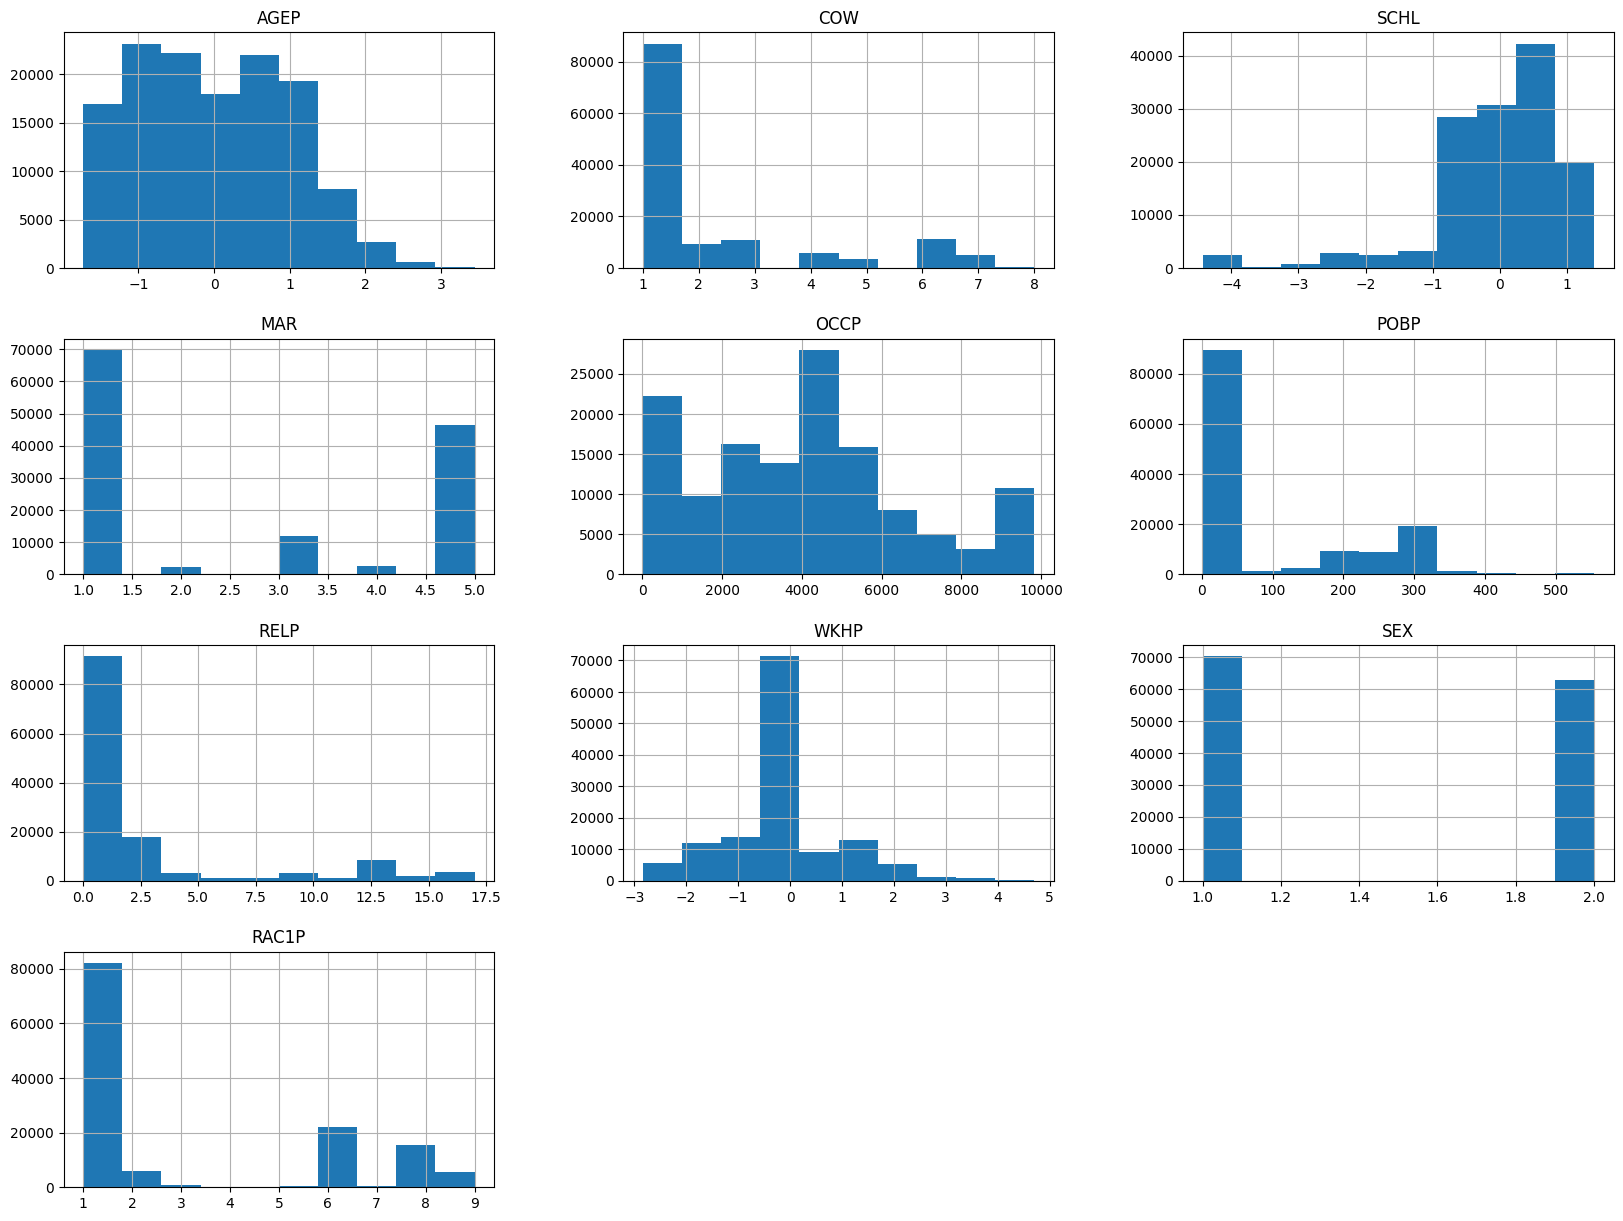

In [5]:
feature_train_set.hist(figsize=(20,15))
plt.show()

# In the histogram we can see the ratio features vs nomimal features

# PART 2: Recherche de bons modèles

## RANDOM FOREST

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Fit a RandomForestClassifier on the training set with default hyperparameters
forest = RandomForestClassifier()
forest.fit(feature_train_set, reshaped_labels_train_set)

RandomForestClassifier()

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# When calculating the cross validation accuracy score, we put cv = 10 making 10 folds for the cross validation
forest_accuracy_score = cross_val_score(forest, income_ca_features, income_ca_labels, cv=10, scoring='accuracy')

# Make predictions on the test set and train set (to check for overfitting)
forest_income_predictions = forest.predict(feature_test_set)
forest_income_predictions_training = forest.predict(feature_train_set)

# Calculate the confusion matrix on the test set, and classification report on the test set and on the train set (to check for overfitting)
forest_confusion = confusion_matrix(reshaped_labels_test_set, forest_income_predictions)
forest_classification_report = classification_report(reshaped_labels_test_set, forest_income_predictions)
forest_classification_report_training = classification_report(reshaped_labels_train_set, forest_income_predictions_training)

# Print the accuracy scores and classification reports
print("Accuracy scores\n", forest_accuracy_score)
print("Classification report on test set\n", forest_classification_report)
print("Classification report on train set\n", forest_classification_report_training)

Accuracy scores
 [0.81655844 0.81234969 0.81403319 0.81156806 0.81150794 0.81768986
 0.81432265 0.8127593  0.81895256 0.81552522]
Classification report on test set
               precision    recall  f1-score   support

       False       0.84      0.85      0.85     19629
        True       0.78      0.77      0.77     13634

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263

Classification report on train set
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     78483
        True       1.00      1.00      1.00     54569

    accuracy                           1.00    133052
   macro avg       1.00      1.00      1.00    133052
weighted avg       1.00      1.00      1.00    133052



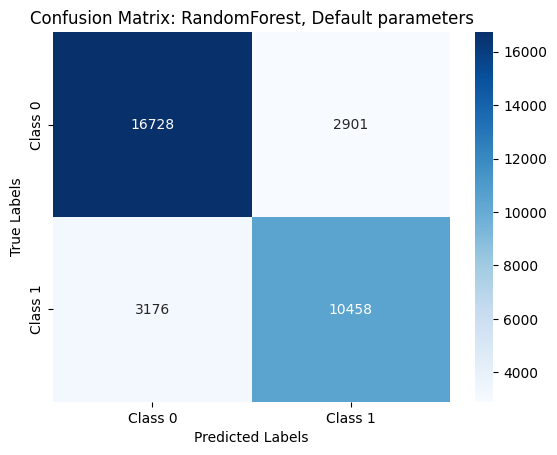

In [8]:
# Print prettier confusion matrixes with seaborn
import seaborn as sns

# Plot confusion matrix
sns.heatmap(forest_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: RandomForest, Default parameters')
plt.show()

In [9]:
print("Accuracy mean, RandomForest, Default parameters\n", np.mean(forest_accuracy_score))

Accuracy mean, RandomForest, Default parameters
 0.8145266910148757


In [10]:
from sklearn.model_selection import GridSearchCV

# Use GridSearchCV from Scikit-Learn to search for the optimal combination of hyperparameters for the RandomForestClassifier
param_grid = [
    {'max_features': [2, 3, 4], 
     'min_samples_leaf': [1, 2, 4, 10],
     'max_depth': [10, 20],
     'n_estimators': [100, 200, 500],
     'n_jobs': [-1]}
]

# We add verbose to the GridSearchCV to get more details about the search while its running
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=2)

# Fit the GridSearch on the training set
grid_search.fit(feature_train_set, reshaped_labels_train_set)

# The best parameters among the grid found with the GridSearchCV
grid_search.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=10, max_features=2, min_samples_leaf=1, n_estimators=100, n_jobs=-1; total time=   1.2s
[CV] END max_depth=10, max_features=2, min_samples_leaf=1, n_estimators=100, n_jobs=-1; total time=   1.1s
[CV] END max_depth=10, max_features=2, min_samples_leaf=1, n_estimators=100, n_jobs=-1; total time=   1.3s
[CV] END max_depth=10, max_features=2, min_samples_leaf=1, n_estimators=100, n_jobs=-1; total time=   1.0s
[CV] END max_depth=10, max_features=2, min_samples_leaf=1, n_estimators=100, n_jobs=-1; total time=   1.0s
[CV] END max_depth=10, max_features=2, min_samples_leaf=1, n_estimators=200, n_jobs=-1; total time=   2.0s
[CV] END max_depth=10, max_features=2, min_samples_leaf=1, n_estimators=200, n_jobs=-1; total time=   1.9s
[CV] END max_depth=10, max_features=2, min_samples_leaf=1, n_estimators=200, n_jobs=-1; total time=   1.9s
[CV] END max_depth=10, max_features=2, min_samples_leaf=1, n_estimators=200, n_job

{'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 4,
 'n_estimators': 500,
 'n_jobs': -1}

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Fitting a new RandomForestClassifier on the fine tuned params
forest_best_params = RandomForestClassifier(max_depth= 20, max_features= 4, min_samples_leaf= 4, n_estimators= 500, n_jobs= -1)
forest_best_params.fit(feature_train_set, reshaped_labels_train_set)

# When calculating the cross validation accuracy score, we put cv = 10 making 10 folds for the cross validation
forest_best_params__accuracy_score = cross_val_score(forest_best_params, income_ca_features, income_ca_labels, cv=10, scoring='accuracy')

# Make predictions on the test set and train set (to check for overfitting)
forest_best_params__income_predictions = forest_best_params.predict(feature_test_set)
forest_best_params__income_predictions_train = forest_best_params.predict(feature_train_set)

# Calculate the confusion matrix on the test set, and classification report on the test set and on the train set (to check for overfitting)
forest_best_params__confusion = confusion_matrix(reshaped_labels_test_set, forest_best_params__income_predictions)
forest_best_params__classification_report = classification_report(reshaped_labels_test_set, forest_best_params__income_predictions)
forest_best_params__classification_report_train = classification_report(reshaped_labels_train_set, forest_best_params__income_predictions_train)

# Print the accuracy scores and classification reports
print("Accuracy scores\n", forest_best_params__accuracy_score)
print("Classification report on test set\n", forest_best_params__classification_report)
print("Classification report on train set\n", forest_best_params__classification_report_train)

Accuracy scores
 [0.82407407 0.81812169 0.81896344 0.81872294 0.81770082 0.82508568
 0.81961397 0.81901269 0.82652877 0.82286092]
Classification report on test set
               precision    recall  f1-score   support

       False       0.85      0.86      0.85     19629
        True       0.79      0.78      0.78     13634

    accuracy                           0.82     33263
   macro avg       0.82      0.82      0.82     33263
weighted avg       0.82      0.82      0.82     33263

Classification report on train set
               precision    recall  f1-score   support

       False       0.91      0.92      0.91     78483
        True       0.88      0.87      0.87     54569

    accuracy                           0.90    133052
   macro avg       0.89      0.89      0.89    133052
weighted avg       0.90      0.90      0.90    133052



In [13]:
print("Accuracy mean, RandomForest, Fine tuned parameters\n", np.mean(forest_best_params__accuracy_score))

Accuracy mean, RandomForest, Fine tuned parameters
 0.8210685010945069


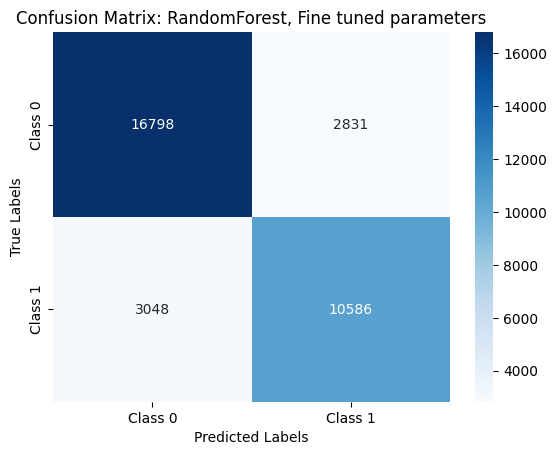

In [14]:
# Print prettier confusion matrixes using seaborn heatmap
import seaborn as sns

# Plot confusion matrix
sns.heatmap(forest_best_params__confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: RandomForest, Fine tuned parameters')
plt.show()

In [34]:
#Save the best RandomForest model
joblib.dump(grid_search.best_estimator_,'RandomForest_BestModel_08211.joblib')

['RandomForest_BestModel_08211.joblib']

## AdaBoost

In [15]:
from sklearn.ensemble import AdaBoostClassifier

# Fit an AdaBoostClassifier on the training set with default hyperparameters
adaboost = AdaBoostClassifier()
adaboost.fit(feature_train_set, reshaped_labels_train_set)

/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [16]:
# When calculating the cross validation accuracy score, we put cv = 10 making 10 folds for the cross validation
adaboost_accuracy_score = cross_val_score(adaboost, income_ca_features, income_ca_labels, cv=10, scoring='accuracy')

# Make predictions on the test set and train set (to check for overfitting)
adaboost_income_predictions = adaboost.predict(feature_test_set)
adaboost_income_predictions_train = adaboost.predict(feature_train_set)

# Calculate the confusion matrix on the test set, and classification report on the test set and on the train set (to check for overfitting)
adaboost_confusion = confusion_matrix(reshaped_labels_test_set, adaboost_income_predictions)
adaboost_classification_report = classification_report(reshaped_labels_test_set, adaboost_income_predictions)
adaboost_classification_report_train = classification_report(reshaped_labels_train_set, adaboost_income_predictions_train)

# Print the accuracy scores and classification reports
print("Accuracy scores\n", adaboost_accuracy_score, "\n")
print("Classification report on test set\n", adaboost_classification_report, "\n")
print("Classification report on train set\n", adaboost_classification_report_train, "\n")

/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

Accuracy scores
 [0.81126744 0.80820106 0.80765993 0.80735931 0.80747956 0.80999339
 0.8072876  0.80608502 0.81696831 0.80806927] 

Classification report on test set
               precision    recall  f1-score   support

       False       0.83      0.84      0.84     19629
        True       0.77      0.76      0.76     13634

    accuracy                           0.81     33263
   macro avg       0.80      0.80      0.80     33263
weighted avg       0.81      0.81      0.81     33263
 

Classification report on train set
               precision    recall  f1-score   support

       False       0.83      0.84      0.84     78483
        True       0.77      0.76      0.76     54569

    accuracy                           0.81    133052
   macro avg       0.80      0.80      0.80    133052
weighted avg       0.81      0.81      0.81    133052
 



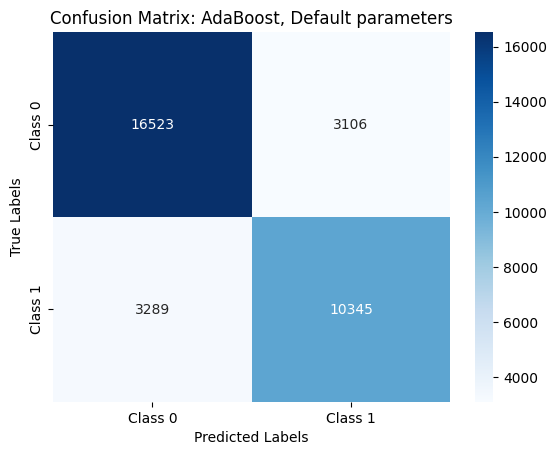

In [17]:
# Plot confusion matrix using seaborn heatmap
sns.heatmap(adaboost_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: AdaBoost, Default parameters')
plt.show()

In [18]:
print("Accuracy mean, AdaBoost, Default parameters \n", np.mean(adaboost_accuracy_score))

Accuracy mean, AdaBoost, Default parameters 
 0.8090370875636343


In [19]:
from sklearn.model_selection import GridSearchCV

# Use GridSearchCV from Scikit-Learn to search for the optimal combination of hyperparameters for the AdaBoostClassifier
param_grid = [
    {'n_estimators': [100, 200, 500],
 	'learning_rate': [0.5, 1.0, 2.0],
 	'algorithm': ['SAMME', 'SAMME.R']
	},
]

# We add verbose to the GridSearchCV to get more details about the search while its running
adaboost = AdaBoostClassifier()
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True, verbose=2)

# Fit the GridSearch on the training set
grid_search.fit(feature_train_set, reshaped_labels_train_set)

# The best parameters among the grid found with the GridSearchCV
grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 500}

In [20]:
# Fitting a new AdaBoostClassifier on the fine tuned params
adaboost_best_params = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate=1.0, n_estimators=500)
adaboost_best_params.fit(feature_train_set, reshaped_labels_train_set)

# When calculating the cross validation accuracy score, we put cv = 10 making 10 folds for the cross validation
adaboost_best_params__accuracy_score = cross_val_score(adaboost_best_params, income_ca_features, income_ca_labels, cv=10, scoring='accuracy')

# Make predictions on the test set and train set (to check for overfitting)
adaboost_best_params__income_predictions = adaboost_best_params.predict(feature_test_set)
adaboost_best_params__income_predictions_train = adaboost_best_params.predict(feature_train_set)

# Calculate the confusion matrix on the test set, and classification report on the test set and on the train set (to check for overfitting)
adaboost_best_params__confusion = confusion_matrix(reshaped_labels_test_set, adaboost_best_params__income_predictions)
adaboost_best_params__classification_report = classification_report(reshaped_labels_test_set, adaboost_best_params__income_predictions)
adaboost_best_params__classification_report_train = classification_report(reshaped_labels_train_set, adaboost_best_params__income_predictions_train)

# Print the accuracy scores and classification reports
print("Accuracy scores\n", adaboost_best_params__accuracy_score, "\n")
print("Classification report on test set\n", adaboost_best_params__classification_report, "\n")
print("Classification report on train set\n", adaboost_best_params__classification_report_train, "\n")

/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=100; total time=   5.9s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=200; total time=  11.1s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=500; total time=  26.9s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=500; total time=  26.3s
[CV] END algorithm=SAMME, learning_rate=2.0, n_estimators=100; total time=   6.1s
[CV] END algorithm=SAMME, learning_rate=2.0, n_estimators=200; total time=  10.5s
[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100; total time=   5.6s
[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100; total time=   5.6s
[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100; total time=   5.9s
[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100; total time=   5.8s
[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=200; total time=  11.6s
[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=500; total time=  28.5s
[CV]

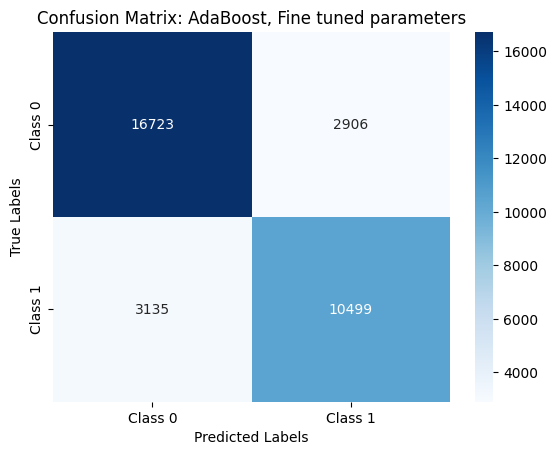

In [21]:
# Plot confusion matrix using seaborn heatmap
sns.heatmap(adaboost_best_params__confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: AdaBoost, Fine tuned parameters')
plt.show()

In [22]:
print("Accuracy mean, AdaBoost, Fine tuned parameters \n", np.mean(adaboost_best_params__accuracy_score))

Accuracy mean, AdaBoost, Fine tuned parameters 
 0.8183928180621104


In [26]:
#Save the best AdaBoost model
joblib.dump(grid_search.best_estimator_,'AdaBoost_BestModel_08184.joblib')

['AdaBoost_BestModel_08184.joblib']

## GradientBoosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit a GradientBoostingClassifier on the training set with default hyperparameters
gradientboost = GradientBoostingClassifier()
gradientboost.fit(feature_train_set, reshaped_labels_train_set)

[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=100; total time=   6.6s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=200; total time=  10.3s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=500; total time=  25.1s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=200; total time=  10.3s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=500; total time=  26.9s
[CV] END algorithm=SAMME, learning_rate=2.0, n_estimators=500; total time=  25.8s
[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100; total time=   5.8s
[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=200; total time=  11.3s
[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=500; total time=  28.6s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=200; total time=  11.4s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=500; total time=  30.4s
[CV] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=500; total time=  28.2s


GradientBoostingClassifier()

In [24]:
# When calculating the cross validation accuracy score, we put cv = 10 making 10 folds for the cross validation
gradientboost_accuracy_score = cross_val_score(gradientboost, income_ca_features, income_ca_labels, cv=10, scoring='accuracy')

# Make predictions on the test set and train set (to check for overfitting)
gradientboost_income_predictions = gradientboost.predict(feature_test_set)
gradientboost_income_predictions_train = gradientboost.predict(feature_train_set)

# Calculate the confusion matrix on the test set, and classification report on the test set and on the train set (to check for overfitting)
gradientboost_confusion = confusion_matrix(reshaped_labels_test_set, gradientboost_income_predictions)
gradientboost_classification_report = classification_report(reshaped_labels_test_set, gradientboost_income_predictions)
gradientboost_classification_report_train = classification_report(reshaped_labels_train_set, gradientboost_income_predictions_train)

# Print the accuracy scores and classification reports
print("Accuracy scores\n", gradientboost_accuracy_score, "\n")
print("Classification report on test set\n", gradientboost_classification_report, "\n")
print("Classification report on train set\n", gradientboost_classification_report_train, "\n")

[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=200; total time=  11.9s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=500; total time=  26.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=200; total time=  10.4s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=500; total time=  25.7s
[CV] END algorithm=SAMME, learning_rate=2.0, n_estimators=200; total time=  10.8s
[CV] END algorithm=SAMME, learning_rate=2.0, n_estimators=500; total time=  26.1s
[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=200; total time=  11.3s
[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=500; total time=  28.5s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=200; total time=  11.7s
[CV] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=100; total time=   5.6s
[CV] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=100; total time=   5.7s
[CV] END algorithm=SAMME.R, learning_rate=2.0, n_estimators=100; total time=   6.0s
[CV]

In [25]:
print("Accuracy mean, GradientBoosting, Default parameters \n", np.mean(gradientboost_accuracy_score))

Accuracy mean, GradientBoosting, Default parameters 
 0.8146409174218686


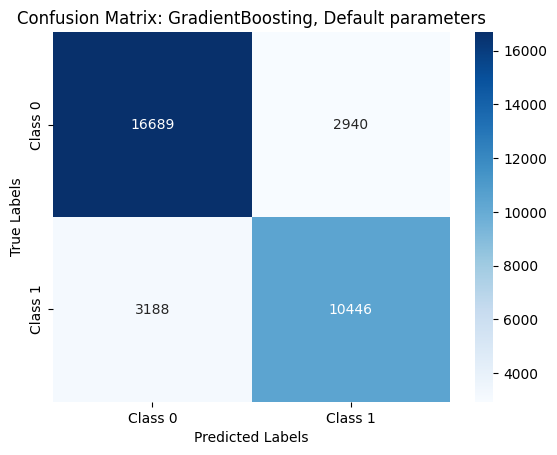

In [26]:
# Plot confusion matrix using seaborn heatmap
sns.heatmap(gradientboost_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: GradientBoosting, Default parameters')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

# Use GridSearchCV from Scikit-Learn to search for the optimal combination of hyperparameters for the GradientBoostClassifier
param_grid = [
    {'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6, 10]},
]

# We add verbose to the GridSearchCV to get more details about the search while its running
gradientboost = GradientBoostingClassifier()
grid_search_gradient = GridSearchCV(gradientboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True, verbose=2)

# Fit the GridSearch on the training set
grid_search_gradient.fit(feature_train_set, reshaped_labels_train_set)

# The best parameters among the grid found with the GridSearchCV
grid_search_gradient.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

In [28]:
# Fitting a new GradientBoostingClassifier on the fine tuned params
gradientboost_best_params = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 6, n_estimators= 200)
gradientboost_best_params.fit(feature_train_set, reshaped_labels_train_set)

# When calculating the cross validation accuracy score, we put cv = 10 making 10 folds for the cross validation
gradientboost_best_params__accuracy_score = cross_val_score(gradientboost_best_params, income_ca_features, income_ca_labels, cv=10, scoring='accuracy')

# Make predictions on the test set and train set (to check for overfitting)
gradientboost_best_params__income_predictions = gradientboost_best_params.predict(feature_test_set)
gradientboost_best_params__income_predictions_train = gradientboost_best_params.predict(feature_train_set)

# Calculate the confusion matrix on the test set, and classification report on the test set and on the train set (to check for overfitting)
gradientboost_best_params__confusion = confusion_matrix(reshaped_labels_test_set, gradientboost_best_params__income_predictions)
gradientboost_best_params__classification_report = classification_report(reshaped_labels_test_set, gradientboost_best_params__income_predictions)
gradientboost_best_params__classification_report_train = classification_report(reshaped_labels_train_set, gradientboost_best_params__income_predictions_train)

# Print the accuracy scores and classification reports
print("Accuracy scores\n", gradientboost_best_params__accuracy_score, "\n")
print("Classification report on test set\n", gradientboost_best_params__classification_report, "\n")
print("Classification report on train set\n", gradientboost_best_params__classification_report_train, "\n")

[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=  15.4s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=200; total time=  29.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=  21.5s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=200; total time=  43.0s
[CV] END .learning_rate=0.05, max_depth=10, n_estimators=200; total time= 1.4min
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=  14.4s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=200; total time=  30.2s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=  23.2s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=  44.0s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time=  42.0s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=  16.4s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=  24.4s
[CV] END ..learning_rate=0.0

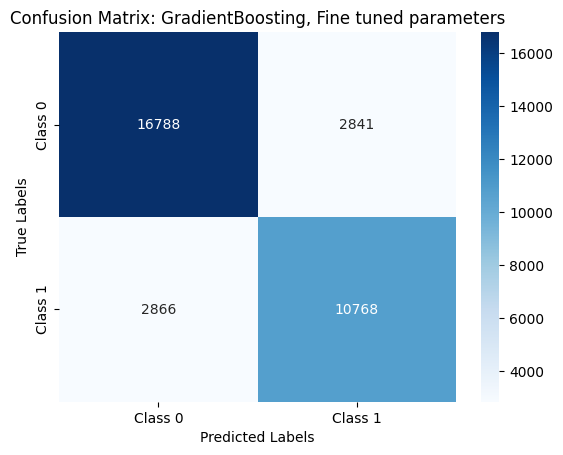

In [29]:
import seaborn as sns

# Plot confusion matrix using seaborn heatmap
sns.heatmap(gradientboost_best_params__confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: GradientBoosting, Fine tuned parameters')
plt.show()

In [30]:
print("Accuracy mean, GradientBoosting, FineTuned parameters\n", np.mean(gradientboost_best_params__accuracy_score))

Accuracy mean, GradientBoosting, FineTuned parameters
 0.8276162781281234


In [44]:
#Save the best model, DONT FORGET TO MODIFY THE NAME
joblib.dump(grid_search_gradient.best_estimator_,'GradientBoost_BestModel_08276.joblib')

['GradientBoost_BestModel_08276.joblib']

## Stacking

In [31]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from joblib import load

# Load the joblib dumps of the best models for the previous Classifiers: RandomForest, AdaBoost and GradientBoosting
forest_best_params = load("/home/greaker/Bureau/5.annee/ApprSupervise/tp-supervise/RandomForest_BestModel_08211.joblib")
adaboost_best_params = load("/home/greaker/Bureau/5.annee/ApprSupervise/tp-supervise/AdaBoost_BestModel_08184.joblib")
gradientboosting_best_params = load("/home/greaker/Bureau/5.annee/ApprSupervise/tp-supervise/GradientBoost_BestModel_08276.joblib")

# Set these best models as the base estimators
estimators = [
    ('Best_RandomForest', forest_best_params),
    ('Best_AdaBoost', adaboost_best_params),
    ('Best_GradientBoosting', gradientboosting_best_params)
]

# Fit the StackingClassifier on the training set, with the best base estimators, 
# a default LogisticsRegressor (the default choise for the StackingClassifier), and otherwise default parameters.
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(feature_train_set, reshaped_labels_train_set)

/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

StackingClassifier(estimators=[('Best_RandomForest',
                                RandomForestClassifier(max_depth=20,
                                                       max_features=4,
                                                       min_samples_leaf=4,
                                                       n_estimators=500,
                                                       n_jobs=-1)),
                               ('Best_AdaBoost',
                                AdaBoostClassifier(n_estimators=500)),
                               ('Best_GradientBoosting',
                                GradientBoostingClassifier(max_depth=6,
                                                           n_estimators=200))],
                   final_estimator=LogisticRegression())

In [32]:
# When calculating the cross validation accuracy score, we put cv = 5 making 5 folds for the cross validation (to save on computation time)
stacking_accuracy_score = cross_val_score(stacking, income_ca_features, income_ca_labels, cv=5, scoring='accuracy')

# Make predictions on the test set and train set (to check for overfitting)
stacking_income_predictions = stacking.predict(feature_test_set)
stacking_income_predictions_train = stacking.predict(feature_train_set)

# Calculate the confusion matrix on the test set, and classification report on the test set and on the train set (to check for overfitting)
stacking_confusion = confusion_matrix(reshaped_labels_test_set, stacking_income_predictions)
stacking_classification_report = classification_report(reshaped_labels_test_set, stacking_income_predictions)
stacking_classification_report_train = classification_report(reshaped_labels_train_set, stacking_income_predictions_train)

# Print the accuracy scores and classification reports
print("Accuracy scores\n", stacking_accuracy_score, "\n")
print("Classification report on test set\n", stacking_classification_report, "\n")
print("Classification report on train set\n", stacking_classification_report_train, "\n")

/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

Accuracy scores
 [0.82812735 0.82533145 0.82966058 0.82491056 0.82978084] 

Classification report on test set
               precision    recall  f1-score   support

       False       0.85      0.86      0.86     19629
        True       0.80      0.78      0.79     13634

    accuracy                           0.83     33263
   macro avg       0.82      0.82      0.82     33263
weighted avg       0.83      0.83      0.83     33263
 

Classification report on train set
               precision    recall  f1-score   support

       False       0.87      0.89      0.88     78483
        True       0.83      0.82      0.83     54569

    accuracy                           0.86    133052
   macro avg       0.85      0.85      0.85    133052
weighted avg       0.86      0.86      0.86    133052
 



In [33]:
print("Accuracy mean, Stacking, Default parameters\n", np.mean(stacking_accuracy_score))

Accuracy mean, Stacking, Default parameters
 0.8275621561494754


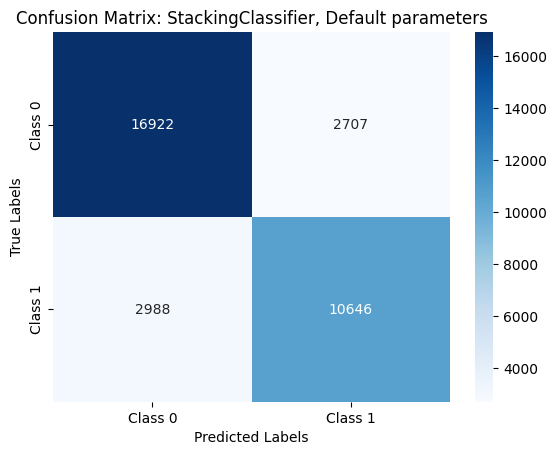

In [34]:
# Plot confusion matrix using seaborn heatmap
sns.heatmap(stacking_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: StackingClassifier, Default parameters')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define final estimators to test
final_estimators = [
    ('lr', LogisticClassifier(max_iter=200)),  # max_iter=200 to ensure that the model has enough iterations to converge during training, otherwise default 
    ('rf', RandomForestClassifier(), # default RandomForestClassifier
    ('svc', SVC(kernel='linear')),  # SVC
    ('gb', GradientBoostingClassifier(n_estimators=100)),  # Gradient Boosting
]

# Use GridSearchCV from Scikit-Learn to search for the optimal combination of hyperparameters for the StackingClassifier
param_grid = [
    {'final_estimator': final_estimators,
     'stack_method': ['auto', 'predict_proba'],
     'passthrough': [True, False], 
     'n_jobs': [-1]}
]

# We add verbose to the GridSearchCV to get more details about the search while its running
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
grid_search_stacking = GridSearchCV(stacking, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True, verbose=2)

# Fit the GridSearch on the training set
grid_search_stacking.fit(feature_train_set, reshaped_labels_train_set)

# The best parameters found in the param grid after the GridSearchCV
grid_search_stacking.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/greaker/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

In [ ]:
# Fitting a new GradientBoostingClassifier on the fine tuned params
stacking_best_params = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(C=1.0), n_jobs=-1, passthrough=False, stack_method= 'predict_proba')
stacking_best_params.fit(feature_train_set, reshaped_labels_train_set)

# When calculating the cross validation accuracy score, we put cv = 5 making 5 folds for the cross validation (to save on computation time)
stacking_best_params__accuracy_score = cross_val_score(stacking_best_params, income_ca_features, income_ca_labels, cv=5, scoring='accuracy')

# Make predictions on the test set and train set (to check for overfitting)
stacking_best_params__income_predictions = stacking_best_params.predict(feature_test_set)
stacking_best_params__income_predictions_train = stacking_best_params.predict(feature_train_set)

# Calculate the confusion matrix on the test set, and classification report on the test set and on the train set (to check for overfitting)
stacking_best_params__confusion = confusion_matrix(reshaped_labels_test_set, stacking_best_params__income_predictions)
stacking_best_params__classification_report = classification_report(reshaped_labels_test_set, stacking_best_params__income_predictions)
stacking_best_params__classification_report_train = classification_report(reshaped_labels_train_set, stacking_best_params__income_predictions_train)

# Print the accuracy scores and classification reports
print("Accuracy scores\n", stacking_best_params__accuracy_score, "\n")
print("Classification report on test set\n", stacking_best_params__classification_report, "\n")
print("Classification report on train set\n", stacking_best_params__classification_report_train, "\n")

In [ ]:
print("Accuracy mean, Stacking, Fine tuned parameters\n", np.mean(stacking_best_params__accuracy_score))

In [ ]:
# Plot confusion matrix of StackingClassifier with fine tuned hyperparameters using seaborn heatmap
sns.heatmap(stacking_best_params__confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: StackingClassifier, Fine tuned parameters')
plt.show()

In [58]:
#Save the best model
joblib.dump(grid_search_stacking.best_estimator_,'Stacking_BestModel_08275.joblib')

['Stacking_BestModel_08275.joblib']